# One Hand Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("3600samplels/onehand.csv")

In [3]:
limit = len(data)

In [4]:
data.columns

Index(['Category(0:button set 1:button pressed)', 'time', 'gazeX', 'gazeY',
       'gyroX', 'gyroY', 'gyroZ', 'accelX', 'accelY', 'accelZ'],
      dtype='object')

In [5]:
data

,Category(0:button set 1:button pressed),time,gazeX,gazeY,gyroX,gyroY,gyroZ,accelX,accelY,accelZ
0,1,1594622959452,165,212,0.224753,-0.076110,0.189889,0.548289,9.138947,4.008016
1,0,1594622960484,719,1292,0.057986,-0.092603,-0.023303,-0.016760,9.119793,3.457333
2,1,1594622962579,719,1292,0.138621,0.437017,0.100703,-0.919402,9.529214,2.760599
3,0,1594622963593,719,932,-0.080069,0.240930,0.177672,-0.112531,8.286585,4.549122
4,1,1594622964120,719,932,-0.036698,1.360035,0.573513,-1.154040,8.312922,5.636123
...,...,...,...,...,...,...,...,...,...,...
3595,0,1594627624189,719,212,-0.036087,-0.068168,-0.077059,-0.823631,3.035940,9.253872
3596,1,1594627624963,719,212,1.249784,2.286717,0.979127,-1.697541,3.873937,9.469357
3597,0,1594627625972,996,2372,-0.020815,-0.088938,-0.042239,-0.780534,2.882707,9.364009
3598,1,1594627626629,996,2372,-0.114278,-0.119481,0.037784,0.687157,2.094990,8.372779


In [6]:
data['gazeX'].unique()

array([ 165,  719,  442,  996, 1273])

In [7]:
data['gazeY'].unique()

array([ 212, 1292,  932, 2372, 1652, 2012,  572])

In [8]:
button_dict = {}
button_error = {}
for i in range(1,36):
    button_dict[i] = []
    button_error[i] = 0
for i in data.index:
    category = data.loc[i, 'Category(0:button set 1:button pressed)']
    y=-1
    x=-1
    if category == 0 and i+1<limit: 
        next_category = data.loc[i+1, 'Category(0:button set 1:button pressed)']
        if next_category == 1:
            delay_mills = data.loc[i+1, 'time'] - data.loc[i, 'time']
            
            if data.loc[i,'gazeY'] == 212:
                y=0
            elif data.loc[i,'gazeY'] == 572:
                y=1
            elif data.loc[i,'gazeY'] == 932:
                y=2
            elif data.loc[i,'gazeY'] == 1292:
                y=3
            elif data.loc[i,'gazeY'] == 1652:
                y=4
            elif data.loc[i,'gazeY'] == 2012:
                y=5
            elif data.loc[i,'gazeY'] == 2372:
                y=6
            
            if data.loc[i,'gazeX'] == 165:
                x=1
            elif data.loc[i,'gazeX'] == 442:
                x=2
            elif data.loc[i,'gazeX'] == 719:
                x=3
            elif data.loc[i,'gazeX'] == 996:
                x=4
            elif data.loc[i,'gazeX'] == 1273:
                x=5
            
            button_num = y*5+x
            if delay_mills > 0 and delay_mills < 1000:
                print(str(i//2)+"th touch delay: "+str(delay_mills/1000)+" on button "+str(button_num))
                button_dict[button_num].append(delay_mills/1000)
            else:
                print(str(i//2)+"th touch data is not valid"+" on button "+str(button_num))
                button_error[button_num]+=1

0th touch data is not valid on button 18
1th touch delay: 0.527 on button 13
2th touch delay: 0.504 on button 32
3th touch delay: 0.471 on button 34
4th touch delay: 0.445 on button 22
5th touch delay: 0.489 on button 12
6th touch delay: 0.433 on button 14
7th touch delay: 0.733 on button 14
8th touch delay: 0.578 on button 3
9th touch delay: 0.534 on button 19
10th touch delay: 0.54 on button 32
11th touch delay: 0.505 on button 12
12th touch delay: 0.562 on button 5
13th touch delay: 0.505 on button 16
14th touch delay: 0.483 on button 11
15th touch delay: 0.469 on button 22
16th touch delay: 0.481 on button 11
17th touch delay: 0.48 on button 2
18th touch delay: 0.498 on button 23
19th touch delay: 0.511 on button 26
20th touch delay: 0.546 on button 6
21th touch delay: 0.549 on button 25
22th touch data is not valid on button 3
23th touch delay: 0.595 on button 32
24th touch delay: 0.49 on button 17
25th touch delay: 0.418 on button 20
26th touch delay: 0.56 on button 3
27th touch 

1527th touch delay: 0.607 on button 4
1528th touch delay: 0.542 on button 7
1529th touch delay: 0.673 on button 32
1530th touch delay: 0.529 on button 33
1531th touch delay: 0.441 on button 24
1532th touch delay: 0.674 on button 3
1533th touch delay: 0.535 on button 24
1534th touch delay: 0.574 on button 11
1535th touch delay: 0.507 on button 7
1536th touch delay: 0.475 on button 9
1537th touch delay: 0.474 on button 8
1538th touch delay: 0.531 on button 23
1539th touch delay: 0.547 on button 30
1540th touch delay: 0.565 on button 12
1541th touch delay: 0.557 on button 3
1542th touch delay: 0.429 on button 14
1543th touch delay: 0.457 on button 13
1544th touch delay: 0.465 on button 10
1546th touch delay: 0.564 on button 4
1547th touch data is not valid on button 28
1548th touch delay: 0.565 on button 32
1549th touch delay: 0.502 on button 33
1550th touch delay: 0.464 on button 24
1551th touch delay: 0.473 on button 13
1552th touch delay: 0.599 on button 25
1553th touch delay: 0.599 on

In [9]:
for i in range(1,36):
    print(str(i)+"th button:")
    print("delay: "+str(button_dict[i]))
    print("error: "+str(button_error[i]))
    print(" ")

1th button:
delay: [0.748, 0.72, 0.662, 0.712, 0.696, 0.647, 0.613, 0.873, 0.713, 0.782, 0.939, 0.612, 0.612, 0.633, 0.675, 0.688, 0.601, 0.663, 0.699, 0.731, 0.632, 0.799, 0.679, 0.681, 0.721, 0.542, 0.674, 0.683, 0.633, 0.696, 0.727, 0.656, 0.674, 0.672, 0.673, 0.689, 0.715, 0.747, 0.587, 0.638, 0.579, 0.614, 0.7, 0.698, 0.644, 0.724, 0.691, 0.634]
error: 5
 
2th button:
delay: [0.48, 0.653, 0.63, 0.547, 0.668, 0.57, 0.689, 0.557, 0.731, 0.588, 0.698, 0.743, 0.708, 0.622, 0.665, 0.557, 0.79, 0.551, 0.591, 0.637, 0.712, 0.649, 0.564, 0.574, 0.655, 0.547, 0.589, 0.579, 0.649, 0.762, 0.664, 0.664, 0.642, 0.67, 0.599]
error: 1
 
3th button:
delay: [0.578, 0.56, 0.532, 0.679, 0.73, 0.612, 0.722, 0.513, 0.688, 0.666, 0.54, 0.836, 0.647, 0.373, 0.604, 0.629, 0.592, 0.573, 0.643, 0.58, 0.579, 0.648, 0.566, 0.573, 0.503, 0.598, 0.614, 0.59, 0.633, 0.596, 0.567, 0.63, 0.55, 0.595, 0.467, 0.564, 0.55, 0.532, 0.781, 0.608, 0.682, 0.549, 0.489, 0.712, 0.605, 0.641, 0.947, 0.539, 0.548, 0.624, 0.5

In [10]:
for i in range(1,36):
    arr = np.array(button_dict[i])
    print("Button "+str(i)+" mean: "+str(np.mean(arr)))

Button 1 mean: 0.6837708333333333
Button 2 mean: 0.6341142857142857
Button 3 mean: 0.6117121212121212
Button 4 mean: 0.591275
Button 5 mean: 0.5908684210526317
Button 6 mean: 0.6302
Button 7 mean: 0.5756909090909091
Button 8 mean: 0.5333333333333334
Button 9 mean: 0.52028
Button 10 mean: 0.5256346153846154
Button 11 mean: 0.5879642857142857
Button 12 mean: 0.5188750000000001
Button 13 mean: 0.5023265306122449
Button 14 mean: 0.4966799999999999
Button 15 mean: 0.5008
Button 16 mean: 0.5605454545454545
Button 17 mean: 0.5063404255319148
Button 18 mean: 0.49848936170212754
Button 19 mean: 0.5094081632653061
Button 20 mean: 0.5482545454545454
Button 21 mean: 0.574404761904762
Button 22 mean: 0.53736
Button 23 mean: 0.5230243902439025
Button 24 mean: 0.520595744680851
Button 25 mean: 0.5549772727272727
Button 26 mean: 0.59258
Button 27 mean: 0.5681666666666666
Button 28 mean: 0.5531842105263157
Button 29 mean: 0.5726382978723404
Button 30 mean: 0.6209318181818181
Button 31 mean: 0.650016666

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

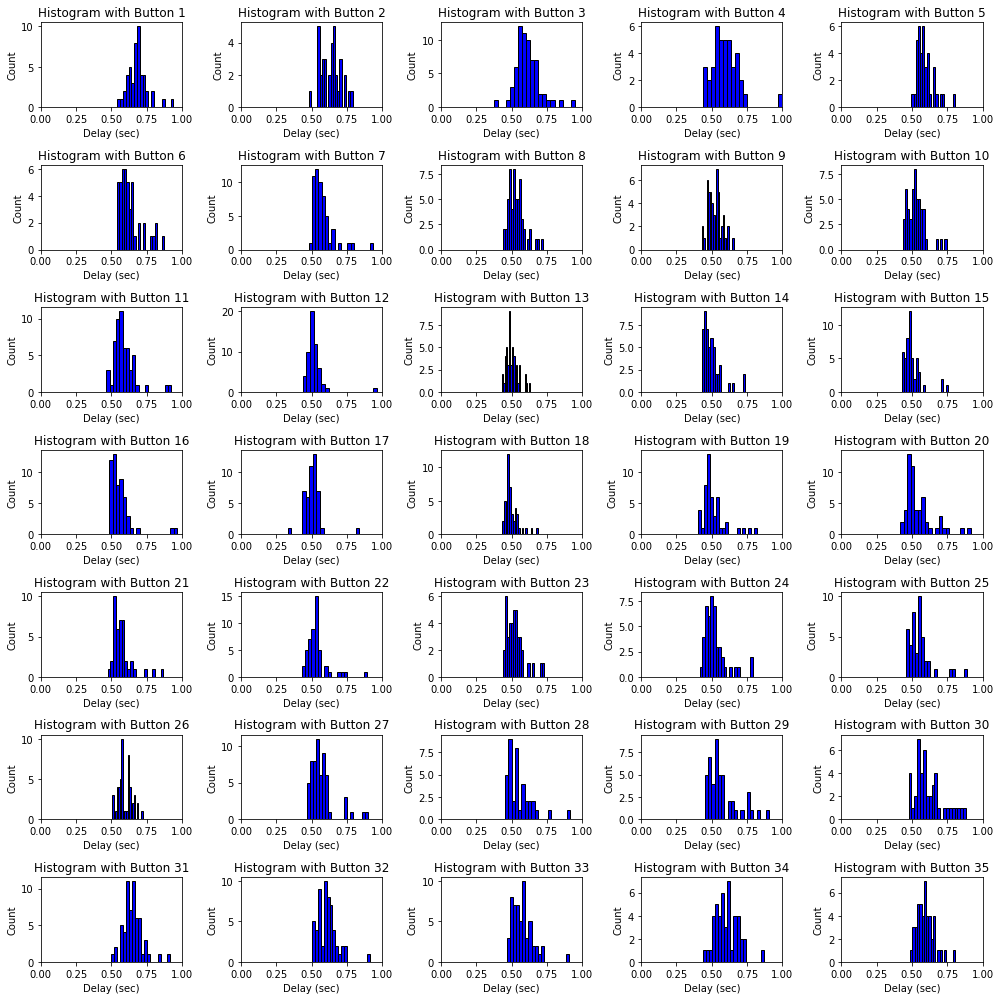

In [12]:
fig,ax = plt.subplots(7, 5, figsize=(14,14))

for i in range(1,36):
    bin_width = 0.05
    
    plt.subplot(7, 5, i )
    ax=plt.gca()
    # matplotlib histogram
    ax.hist(button_dict[i], color = 'blue', edgecolor = 'black', bins = int(1/bin_width))

    # Add labels
#     ax.set_title('Histogram with Button %d' % i, size = 30)
#     ax.set_xlabel('Count', size = 22)
#     ax.set_ylabel('Delay (sec)', size = 22)
    ax.set_title('Histogram with Button %d' % i)
    ax.set_ylabel('Count')
    ax.set_xlabel('Delay (sec)')
    ax.set_xlim([0,1])
plt.tight_layout()
plt.show()

In [13]:
mean_list=[]
for i in range(1,36):
    arr = np.array(button_dict[i])
    print("Button "+str(i)+" mean: "+str(np.mean(arr)))
    mean_list.append(np.mean(arr))

Button 1 mean: 0.6837708333333333
Button 2 mean: 0.6341142857142857
Button 3 mean: 0.6117121212121212
Button 4 mean: 0.591275
Button 5 mean: 0.5908684210526317
Button 6 mean: 0.6302
Button 7 mean: 0.5756909090909091
Button 8 mean: 0.5333333333333334
Button 9 mean: 0.52028
Button 10 mean: 0.5256346153846154
Button 11 mean: 0.5879642857142857
Button 12 mean: 0.5188750000000001
Button 13 mean: 0.5023265306122449
Button 14 mean: 0.4966799999999999
Button 15 mean: 0.5008
Button 16 mean: 0.5605454545454545
Button 17 mean: 0.5063404255319148
Button 18 mean: 0.49848936170212754
Button 19 mean: 0.5094081632653061
Button 20 mean: 0.5482545454545454
Button 21 mean: 0.574404761904762
Button 22 mean: 0.53736
Button 23 mean: 0.5230243902439025
Button 24 mean: 0.520595744680851
Button 25 mean: 0.5549772727272727
Button 26 mean: 0.59258
Button 27 mean: 0.5681666666666666
Button 28 mean: 0.5531842105263157
Button 29 mean: 0.5726382978723404
Button 30 mean: 0.6209318181818181
Button 31 mean: 0.650016666

# My 3d plot

In [14]:
X = list(range(1,6))
Y = list(range(0,7))
Z = mean_list

arr_data=[]
for i in X:
    for j in Y:
        arr_data.append([i,j+1,mean_list[j*5+i-1]])
arr_data = np.array(arr_data)

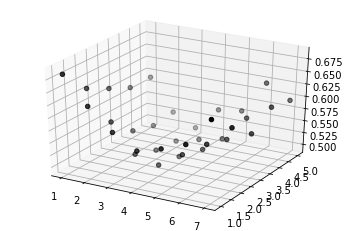

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style

# style.use('fivethirtyeight')
Y = arr_data[:,0]
X = arr_data[:,1]
Z = arr_data[:,2]
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.scatter(X, Y, Z, color='black')
plt.show()

In [16]:
x=[]
y=[]
z=[]
for i in range(0,7):
    x.append(list(range(1,6)))
x = np.array(x)
x

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

In [17]:
for i in reversed(range(0,7)):
    y.append([i]*5)
y = np.array(y)
y

array([[6, 6, 6, 6, 6],
       [5, 5, 5, 5, 5],
       [4, 4, 4, 4, 4],
       [3, 3, 3, 3, 3],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0]])

In [18]:
for i in range(0,7):
    temp_list=[]
    for j in range(1,6):
        temp_list.append(mean_list[i*5+j-1])
    z.append(temp_list)
z = np.array(z)
z

array([[0.68377083, 0.63411429, 0.61171212, 0.591275  , 0.59086842],
       [0.6302    , 0.57569091, 0.53333333, 0.52028   , 0.52563462],
       [0.58796429, 0.518875  , 0.50232653, 0.49668   , 0.5008    ],
       [0.56054545, 0.50634043, 0.49848936, 0.50940816, 0.54825455],
       [0.57440476, 0.53736   , 0.52302439, 0.52059574, 0.55497727],
       [0.59258   , 0.56816667, 0.55318421, 0.5726383 , 0.62093182],
       [0.65001667, 0.61029825, 0.57401786, 0.60380435, 0.59454348]])

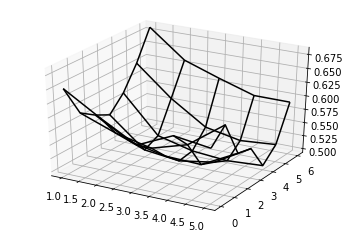

In [19]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_wireframe(x,y,z, color='black')

# Filling in intervals

In [20]:
interval = 0.2

x_interp=np.arange(1,5+interval,interval)
z_interp=[]
for i in range(0,7):
    z_interp.append(np.interp(x_interp,x[i],z[i]))
df = pd.DataFrame(z_interp)
z_transpose_interp=[]
y_interp=np.arange(1,7+interval,interval)
x_interp

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
       3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ])

In [21]:
y_interp

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
       3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6, 5.8, 6. ,
       6.2, 6.4, 6.6, 6.8, 7. ])

In [22]:
for i in range(0,len(x_interp)):
    z_transpose_interp.append(np.interp(y_interp,[1,2,3,4,5,6,7],list(df[i])))
z_transpose_interp = np.asarray(z_transpose_interp)
df = pd.DataFrame(z_transpose_interp)
z_transpose_interp = np.asarray(df.transpose())
df = pd.DataFrame(z_transpose_interp)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.683771,0.673840,0.663908,0.653977,0.644046,0.634114,0.629634,0.625153,0.620673,0.616193,...,0.607625,0.603537,0.599450,0.595362,0.591275,0.591194,0.591112,0.591031,0.590950,0.590868
1,0.673057,0.662931,0.652806,0.642680,0.632555,0.622430,0.617151,0.611872,0.606594,0.601315,...,0.592244,0.588452,0.584660,0.580868,0.577076,0.577225,0.577374,0.577523,0.577673,0.577822
2,0.662342,0.652023,0.641703,0.631384,0.621064,0.610745,0.604668,0.598591,0.592514,0.586437,...,0.576864,0.573367,0.569870,0.566374,0.562877,0.563257,0.563636,0.564016,0.564395,0.564775
3,0.651628,0.641115,0.630601,0.620087,0.609574,0.599060,0.592185,0.585310,0.578435,0.571560,...,0.561483,0.558282,0.555081,0.551879,0.548678,0.549288,0.549898,0.550508,0.551118,0.551728
4,0.640914,0.630206,0.619499,0.608791,0.598083,0.587376,0.579702,0.572029,0.564356,0.556682,...,0.546103,0.543197,0.540291,0.537385,0.534479,0.535319,0.536160,0.537000,0.537841,0.538681
5,0.630200,0.619298,0.608396,0.597495,0.586593,0.575691,0.567219,0.558748,0.550276,0.541805,...,0.530723,0.528112,0.525501,0.522891,0.520280,0.521351,0.522422,0.523493,0.524564,0.525635
6,0.621753,0.610268,0.598783,0.587298,0.575813,0.564328,0.556889,0.549449,0.542010,0.534571,...,0.524818,0.522503,0.520189,0.517874,0.515560,0.516582,0.517603,0.518625,0.519646,0.520668
7,0.613306,0.601237,0.589169,0.577101,0.565033,0.552965,0.546558,0.540151,0.533744,0.527337,...,0.518912,0.516894,0.514876,0.512858,0.510840,0.511812,0.512784,0.513756,0.514729,0.515701
8,0.604859,0.592207,0.579556,0.566904,0.554253,0.541601,0.536227,0.530853,0.525478,0.520104,...,0.513007,0.511286,0.509564,0.507842,0.506120,0.507043,0.507966,0.508888,0.509811,0.510734
9,0.596411,0.583177,0.569942,0.556707,0.543473,0.530238,0.525896,0.521554,0.517212,0.512870,...,0.507102,0.505677,0.504251,0.502826,0.501400,0.502273,0.503147,0.504020,0.504894,0.505767


In [23]:
x_interp_arr = []
for i in range(len(y_interp)):
    x_interp_arr.append(x_interp.tolist())
x_interp_arr = np.array(x_interp_arr)
df = pd.DataFrame(x_interp_arr)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
1,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
2,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
3,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
4,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
5,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
6,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
7,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
9,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0


In [24]:
y_interp_arr = []
for i in range(len(y_interp)):
    y_interp_arr.append([y_interp[-(i+1)]]*len(x_interp))
y_interp_arr = np.array(y_interp_arr)
df = pd.DataFrame(y_interp_arr)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
1,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,...,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8
2,6.6,6.6,6.6,6.6,6.6,6.6,6.6,6.6,6.6,6.6,...,6.6,6.6,6.6,6.6,6.6,6.6,6.6,6.6,6.6,6.6
3,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4,...,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4,6.4
4,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,...,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2,6.2
5,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
6,5.8,5.8,5.8,5.8,5.8,5.8,5.8,5.8,5.8,5.8,...,5.8,5.8,5.8,5.8,5.8,5.8,5.8,5.8,5.8,5.8
7,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,...,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6,5.6
8,5.4,5.4,5.4,5.4,5.4,5.4,5.4,5.4,5.4,5.4,...,5.4,5.4,5.4,5.4,5.4,5.4,5.4,5.4,5.4,5.4
9,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2,...,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2,5.2


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_wireframe(x_interp_arr,y_interp_arr,z_transpose_interp, color='blue')

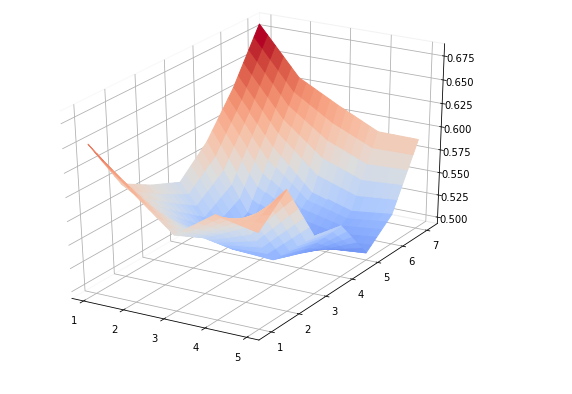

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')

norm = plt.Normalize(vmin=0.46, vmax=0.68)
colors = cm.coolwarm(norm(z_transpose_interp))
rcount, ccount, _ = colors.shape

# OUR ONE LINER ADDED HERE:
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.7, 1.2, 1, 1]))
surf = ax.plot_surface(x_interp_arr,y_interp_arr,z_transpose_interp, rcount=rcount, ccount=ccount,
                       facecolors=colors, shade=False)
#plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.coolwarm), ax=ax)
#ax.scatter(aY,aX,aZ, color='black')

# ax.set_xlim(1,5)
# ax.set_ylim(1,7)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


plt.show()

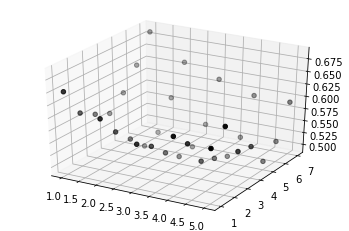

In [26]:
aX = list(range(1,6))
aY = list(range(0,7))
aZ = mean_list

arr_data=[]
for i in aX:
    for j in aY:
        arr_data.append([i,j+1,mean_list[j*5+i-1]])
arr_data = np.array(arr_data)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style

# style.use('fivethirtyeight')
aY = arr_data[:,0]
aX = arr_data[:,1].tolist()[::-1]
aZ = arr_data[:,2]
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.scatter(aY, aX, aZ, color='black')
plt.show()

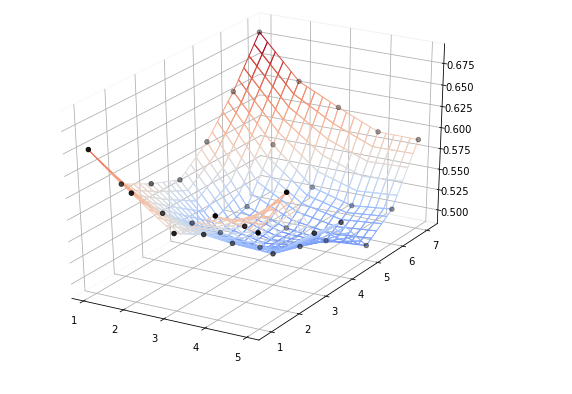

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')

norm = plt.Normalize(vmin=0.46, vmax=0.68)
colors = cm.coolwarm(norm(z_transpose_interp))
rcount, ccount, _ = colors.shape

# OUR ONE LINER ADDED HERE:
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.7, 1.2, 1, 1]))
surf = ax.plot_surface(x_interp_arr,y_interp_arr,z_transpose_interp, rcount=rcount, ccount=ccount,
                       facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))
#plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.coolwarm), ax=ax)
ax.scatter(aY,aX,aZ, color='black')

# ax.set_xlim(1,5)
# ax.set_ylim(1,7)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


plt.show()

In [28]:
y_interp_arr = []
for i in range(len(y_interp)):
    y_interp_arr.append([y_interp[i]]*len(x_interp))
y_interp_arr = np.array(y_interp_arr)
df = pd.DataFrame(y_interp_arr)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,...,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2
2,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,...,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4
3,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,...,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6
4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
5,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
6,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,...,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2
7,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,...,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4
8,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,...,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6
9,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,...,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8


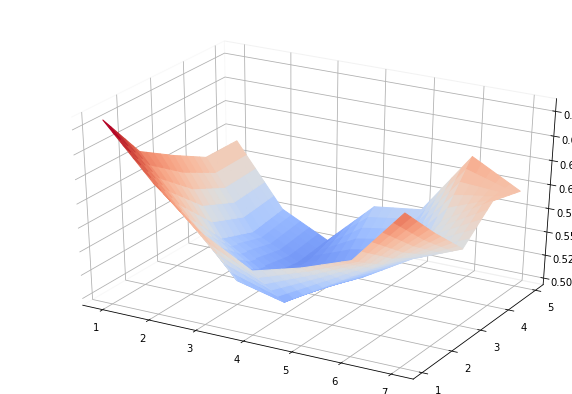

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')

norm = plt.Normalize(vmin=0.46, vmax=0.68)
colors = cm.coolwarm(norm(z_transpose_interp))
rcount, ccount, _ = colors.shape

# OUR ONE LINER ADDED HERE:
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.2, 0.9, 1, 1]))
surf = ax.plot_surface(y_interp_arr,x_interp_arr,z_transpose_interp, rcount=rcount, ccount=ccount,
                       facecolors=colors, shade=False)
#plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.coolwarm), ax=ax)
#ax.scatter(X,Y,Z, color='black')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# ax.set_xlim(1,5)
# ax.set_ylim(1,7)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.set_axis_off()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()


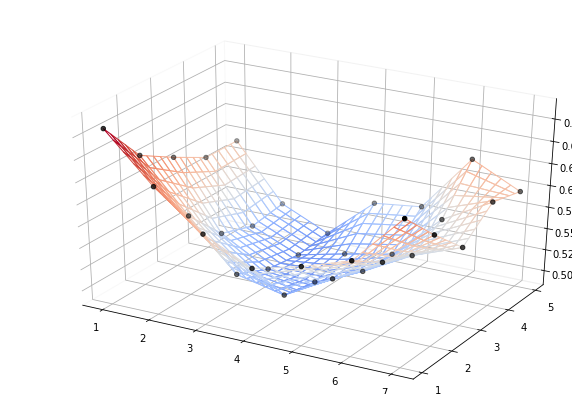

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')

norm = plt.Normalize(vmin=0.46, vmax=0.68)
colors = cm.coolwarm(norm(z_transpose_interp))
rcount, ccount, _ = colors.shape

# OUR ONE LINER ADDED HERE:
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.2, 0.9, 1, 1]))
surf = ax.plot_surface(y_interp_arr,x_interp_arr,z_transpose_interp, rcount=rcount, ccount=ccount,
                       facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))
#plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.coolwarm), ax=ax)
ax.scatter(X,Y,Z, color='black')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# ax.set_xlim(1,5)
# ax.set_ylim(1,7)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.set_axis_off()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()


# Heatmap

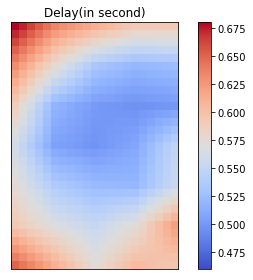

In [31]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
# sphinx_gallery_thumbnail_number = 2

vegetables = y_interp_arr
farmers = x_interp_arr

fig, ax = plt.subplots()
#heatmap = ax.pcolor(z_transpose_interp, cmap=cm.coolwarm)
im = ax.imshow(z_transpose_interp,cmap=cm.coolwarm, vmin=0.46, vmax=0.68)
    
ax.set_xticklabels([0,1,2,3,4,5])
ax.set_yticklabels([0,1,2,3,4,5,6,7])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")
cbar = plt.colorbar(im)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.title('Delay(in second)')
fig.tight_layout()
plt.show()

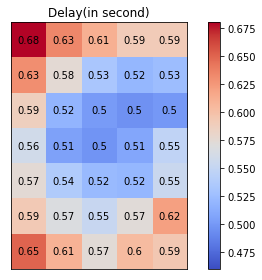

In [32]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
# sphinx_gallery_thumbnail_number = 2

fig, ax = plt.subplots()
#heatmap = ax.pcolor(z_transpose_interp, cmap=cm.coolwarm)
im = ax.imshow(z,cmap=cm.coolwarm, vmin=0.46, vmax=0.68)
    
ax.set_xticklabels([0,1,2,3,4,5])
ax.set_yticklabels([0,1,2,3,4,5,6,7])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")
for i in range(7):
    for j in range(5):
        text = ax.text(j, i, round(z[i, j],2),
                       ha="center", va="center", color="black")
cbar = plt.colorbar(im)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.title('Delay(in second)')
fig.tight_layout()
plt.show()